### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [44]:
Group = 'Group 3'
Name = 'My Pham (Classification), Monica Kulkarnk (Regression)'

### Sources of Datasets

1. Regression: Bike Sharing Data ('bikesharing.csv')

Source: https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Bike%20Sharing

Introduction: 

This data set, consisting of 17,379 rows and 17 columns, contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bike-share system with the corresponding weather and seasonal information. Bike-sharing rental process is highly correlated to the environmental and seasonal settings.

2. Classification: Heart Disease Prediction ('framingham_heart_disease.csv')

Source: https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression

Introduction: 

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation. The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Column description:
- male: 0 = Female; 1 = Male (boolean)
- age: age of patient at exam time (integer)
- education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college (ordinal)
- currentSmoker: 0 = nonsmoker; 1 = smoker (boolean)
- cigsPerDay: number of cigarettes smoked per day (estimated average) (float)
- BPMeds: 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications (boolean)
- prevalentStroke: 0 = previously had no stroke; 1 = previously had a stroke (boolean)
- prevalentHyp: 0 = patient was not hypertensive; 1 = patient was hypertensive (boolean)
- diabetes: 0 = No; 1 = Yes (boolean)
- totChol: total cholesterol level (mg/dL) (float)
- sysBP: systolic blood pressure (mmHg) (float)
- diaBP: diastolic blood pressure (mmHg) (float)
- BMI: Body Mass Index = Weight (kg)/Height(meter-squared) (float)
- heartRate: Beats/Min (Ventricular) (float)
- glucose: glucose level (mg/dL) (float)
- TenYearCHD: 10 year risk of coronary heart disease CHD (0 = No; 1 = Yes) (boolean)

## Part 2: Classification Task:

### Data Preprocess

1. Exploratory Data Analysis

In [1]:
# Surpress warnings and import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn import model_selection
import matplotlib.mlab as mlab
%matplotlib inline 

In [46]:
# Import dataset
hd = pd.read_csv('framingham_heart_disease.csv')
hd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [47]:
print("The size of the dataset is: ", hd.shape) # Number of rows and columns met the condition

The size of the dataset is:  (4238, 16)


In [48]:
print("Column names are: ", hd.keys())

Column names are:  Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [49]:
# Rename Male column to Sex
hd.rename(columns={'male':'sex'}, inplace=True)
hd.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Male column needs to be renamed to Sex so that Male = 1, Female = 0.

2. Missing data

In [50]:
# Count missing data in each column
total = hd.isnull().sum().sort_values(ascending = False)
percent = 100*total/len(hd)
missingCol = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missingCol

,Total,Percent
glucose,388,9.155262
education,105,2.477584
BPMeds,53,1.250590
totChol,50,1.179802
cigsPerDay,29,0.684285
BMI,19,0.448325
heartRate,1,0.023596
TenYearCHD,0,0.000000
diaBP,0,0.000000
sysBP,0,0.000000


In [51]:
# Count number of rows with missing data
count=0
for i in hd.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Number of rows with missing data is: ', count)
print('Percentage of rows with missing data compared to the entire dataset is: ',round((count/len(hd.index))*100))

Number of rows with missing data is:  582
Percentage of rows with missing data compared to the entire dataset is:  14


In [52]:
# Replace missing data with median of columns
hd.fillna(hd.median(), inplace=True)
hd.head(10)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Missing data may impact the results of the models so they can be replaced with the median of each column.

In [53]:
# Check for missing data in the updated dataset
hd.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [54]:
# Data have been converted to numeric types
hd.dtypes    # At least 2 categorical/ordinal columns condition is met

sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [55]:
# Description of updated dataset
hd.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [56]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
sex                4238 non-null int64
age                4238 non-null int64
education          4238 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4238 non-null float64
BPMeds             4238 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4238 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4238 non-null float64
heartRate          4238 non-null float64
glucose            4238 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.8 KB


3. Data visualization

In [57]:
# Correlation matrix
corr = hd.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex,1,-0.02898,0.01721,0.1976,0.3156,-0.05154,-0.004546,0.005313,0.01571,-0.06955,-0.03599,0.05793,0.08165,-0.1166,0.01007,0.08843
age,-0.02898,1,-0.1635,-0.2137,-0.1918,0.121,0.05765,0.3072,0.1013,0.2601,0.3943,0.2061,0.1352,-0.01285,0.1178,0.2253
education,0.01721,-0.1635,1,0.01827,0.007618,-0.01036,-0.03515,-0.08102,-0.03814,-0.02236,-0.1283,-0.06172,-0.1355,-0.05368,-0.03398,-0.05338
currentSmoker,0.1976,-0.2137,0.01827,1,0.7602,-0.04836,-0.03299,-0.1033,-0.0443,-0.04647,-0.1302,-0.1077,-0.1672,0.06233,-0.05518,0.01946
cigsPerDay,0.3156,-0.1918,0.007618,0.7602,1,-0.04467,-0.03224,-0.06505,-0.03615,-0.02698,-0.08838,-0.05669,-0.09221,0.07385,-0.05686,0.05886
BPMeds,-0.05154,0.121,-0.01036,-0.04836,-0.04467,1,0.1146,0.2587,0.05139,0.07858,0.2515,0.1924,0.09958,0.01514,0.04912,0.08642
prevalentStroke,-0.004546,0.05765,-0.03515,-0.03299,-0.03224,0.1146,1,0.07483,0.006949,0.0001226,0.05701,0.04519,0.02426,-0.01767,0.01872,0.06181
prevalentHyp,0.005313,0.3072,-0.08102,-0.1033,-0.06505,0.2587,0.07483,1,0.07781,0.1631,0.6968,0.6158,0.3005,0.1472,0.08357,0.1776
diabetes,0.01571,0.1013,-0.03814,-0.0443,-0.03615,0.05139,0.006949,0.07781,1,0.04012,0.1113,0.05033,0.08603,0.049,0.6065,0.09732
totChol,-0.06955,0.2601,-0.02236,-0.04647,-0.02698,0.07858,0.0001226,0.1631,0.04012,1,0.2075,0.1639,0.1148,0.09054,0.04556,0.08157


In [58]:
# Get list of features
features = hd.drop('TenYearCHD', 1).columns
print(features.tolist())

['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


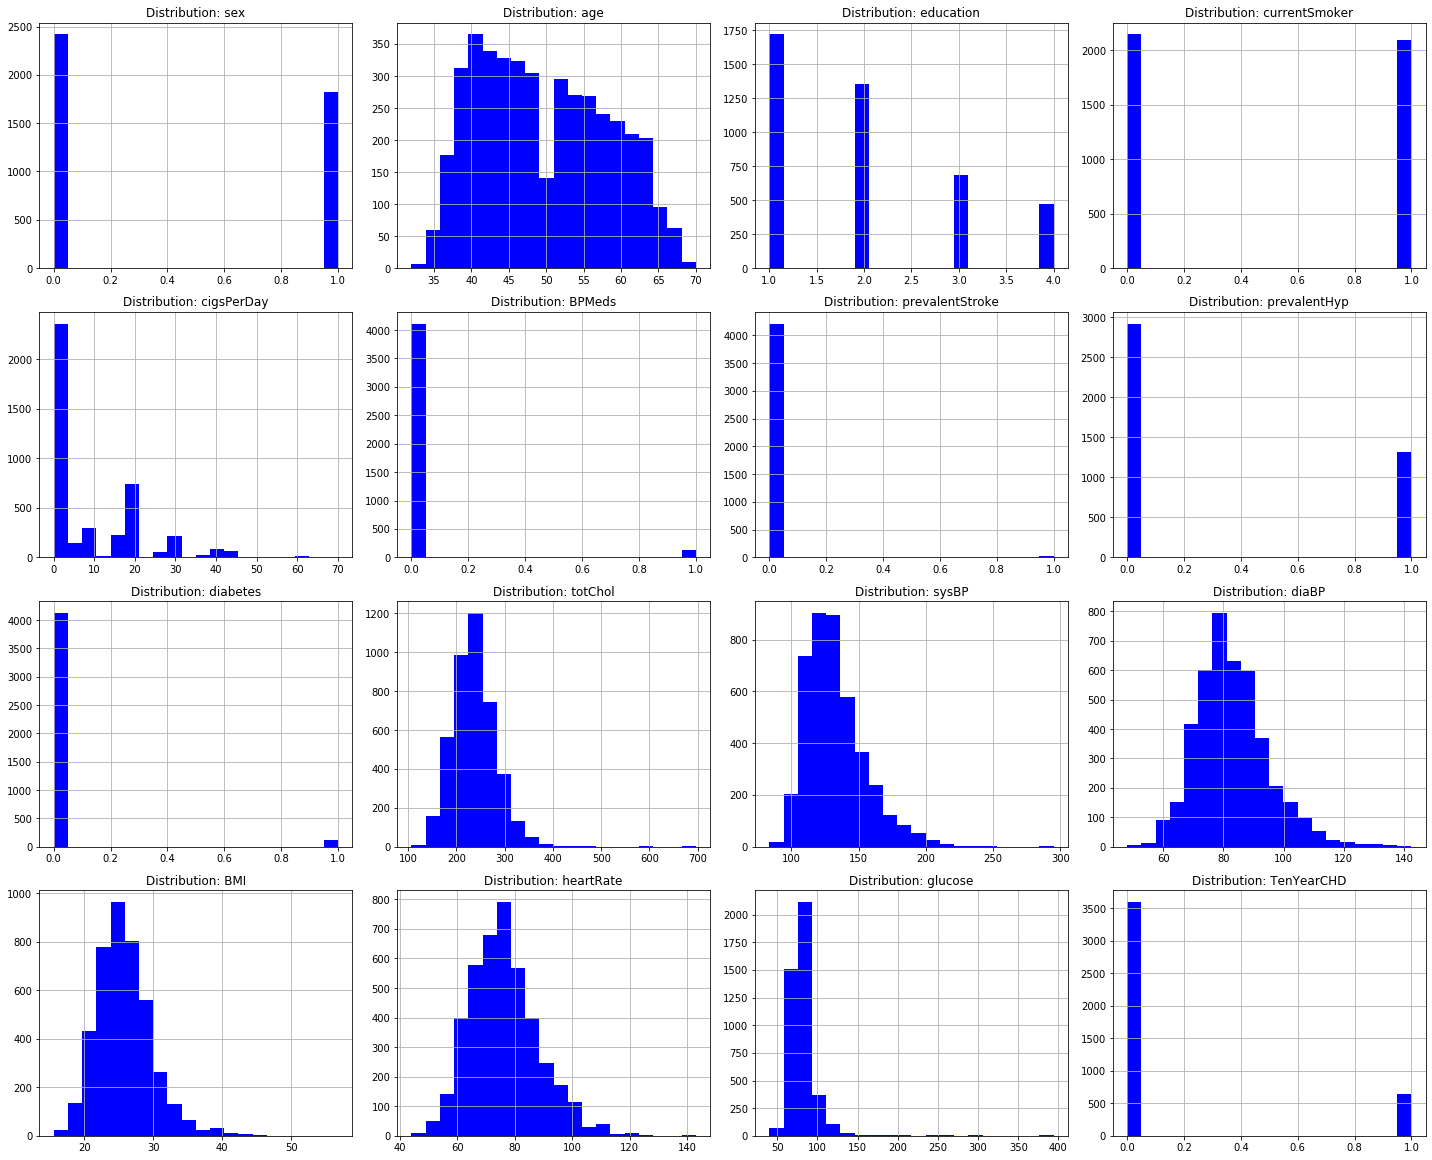

In [59]:
# Histograms for features
def plot_hists(hd, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        hd[feature].hist(bins=20,ax=ax,facecolor='blue')
        ax.set_title('Distribution: '+ feature) 
    fig.tight_layout() 
    plt.show()

plot_hists(hd,hd.columns,5,4)

As each feature has a different range of values, data scaling will be necessary.

5. Data scaling

In [60]:
# Separate dataset into X (input features) and y (output label) and convert dataset to a NumPy array
hd.to_numpy()
X = hd.drop('TenYearCHD',1).to_numpy()
y = hd['TenYearCHD'].to_numpy()

Min-Max Scaling is useful in this case as the features have hard boundaries and the technique produces values of range [0,1].

In [61]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Classification Models

#### 1. Voting Classifiers

    a. Logistic Regression with Hard Voting

In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(C=1, penalty='l1')
log_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf)], voting='hard')
lr_voting = voting_clf.fit(X_train, y_train)
y_pred_lr = lr_voting.predict(X_test)

print('Logistic Regression with Hard Voting:')
print('Train score: {:.4f}'.format(voting_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(voting_clf.score(X_test, y_test)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_lr)))

Logistic Regression with Hard Voting:
Train score: 0.8597
Test score: 0.8434
Accuracy score: 0.8434


    b. KNN with Soft Voting

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(20)
knn_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('knn', knn_clf)], voting='soft')
knn_voting = voting_clf.fit(X_train, y_train)
y_pred_knn = knn_voting.predict(X_test)

print('KNN with Soft Voting:')
print('Train score: {:.4f}'.format(voting_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(voting_clf.score(X_test, y_test)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_knn)))

KNN with Soft Voting:
Train score: 0.8521
Test score: 0.8396
Accuracy score: 0.8396


#### 2. Bagging

    a. Decision Tree

In [64]:
# GridSearch

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=1, max_leaf_nodes=2, min_samples_split=2)
bag_dt = BaggingClassifier(dt_clf, bootstrap=True, random_state=0, oob_score=True)

param = {'n_estimators':[200,500], 'max_samples':[100,200]}
bag_dt_grid_search = GridSearchCV(BaggingClassifier(dt_clf), param, cv=5)
bag_dt_grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(bag_dt_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(bag_dt_grid_search.best_score_))

# Cross-validation
bag_dt_scores = cross_val_score(bag_dt, X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(bag_dt_scores.mean()))

Best parameters: {'max_samples': 100, 'n_estimators': 200}
Best cross-validation score: 0.8508
Average cross-validation score: 0.8509


In [65]:
# Best parameters

bag_clf = BaggingClassifier(dt_clf, n_estimators=200, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred_bag_dt = bag_clf.predict(X_test)

print('Bagging with Decision Tree:')
print('Train score: {:.4f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(X_test, y_test)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_bag_dt)))

Bagging with Decision Tree:
Train score: 0.8508
Test score: 0.8396
Accuracy score: 0.8396


    b. LinearSVC

In [ ]:
# GridSearch

from sklearn.svm import LinearSVC

svc_clf = LinearSVC(C=10)
bag_svc = BaggingClassifier(svc_clf, bootstrap=True, random_state=0, oob_score=True)

param = {'n_estimators':[200,500], 'max_samples':[100,200]}
bag_svc_grid_search = GridSearchCV(BaggingClassifier(svc_clf), param, cv=5)
bag_svc_grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(bag_svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(bag_svc_grid_search.best_score_))

# Cross-validation
bag_svc_scores = cross_val_score(bag_svc, X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(bag_svc_scores.mean()))

In [ ]:
# Best parameters

bag_clf = BaggingClassifier(svc_clf, n_estimators=200, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred_bag_svc = bag_clf.predict(X_test)

print('Bagging with LinearSVC:')
print('Train score: {:.4f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(X_test, y_test)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_bag_svc)))

#### 3. Pasting

    a. Decision Tree

In [ ]:
# GridSearch

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=1, max_leaf_nodes=2, min_samples_split=2)
bag_dt = BaggingClassifier(dt_clf, bootstrap=False, random_state=0)

param = {'n_estimators':[200,500], 'max_samples':[100,200]}
bag_dt_grid_search = GridSearchCV(BaggingClassifier(dt_clf), param, cv=5)
bag_dt_grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(bag_dt_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(bag_dt_grid_search.best_score_))

# Cross-validation
bag_dt_scores = cross_val_score(bag_dt, X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(bag_dt_scores.mean()))

In [ ]:
# Best parameters

bag_clf = BaggingClassifier(dt_clf, n_estimators=200, max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train, y_train)
y_pred_bag_dt = bag_clf.predict(X_test)

print('Pasting with Decision Tree:')
print('Train score: {:.4f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(X_test, y_test)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_bag_dt)))

    b. LinearSVC

In [ ]:
# GridSearch

from sklearn.svm import LinearSVC

svc_clf = LinearSVC(C=10)
bag_svc = BaggingClassifier(svc_clf, bootstrap=False, random_state=0)

param = {'n_estimators':[200,500], 'max_samples':[100,200]}
bag_svc_grid_search = GridSearchCV(BaggingClassifier(svc_clf), param, cv=5)
bag_svc_grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(bag_svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(bag_svc_grid_search.best_score_))

# Cross-validation
bag_svc_scores = cross_val_score(bag_svc, X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(bag_svc_scores.mean()))

In [ ]:
# Best parameters

bag_clf = BaggingClassifier(svc_clf, n_estimators=200, max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train, y_train)
y_pred_bag_svc = bag_clf.predict(X_test)

print('Pasting with LinearSVC:')
print('Train score: {:.4f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(X_test, y_test)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_bag_svc)))

#### 4. AdaBoost

    a. Decision Tree

In [ ]:
# GridSearch

from sklearn.ensemble import AdaBoostClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=1, max_leaf_nodes=2, min_samples_split=2)
ada_dt = AdaBoostClassifier(dt_clf)

param = {'base_estimator__criterion':["gini", "entropy"],'base_estimator__splitter':["best","random"], 'n_estimators':[100,200], 'learning_rate':[0.8, 1.0]}
ada_dt_grid_search = GridSearchCV(AdaBoostClassifier(dt_clf), param)
ada_dt_grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(ada_dt_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(ada_dt_grid_search.best_score_))

# Cross-validation
ada_dt_scores = cross_val_score(ada_dt, X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(ada_dt_scores.mean()))

In [ ]:
# Best parameters

ada_clf = AdaBoostClassifier(dt_clf, n_estimators=100, algorithm="SAMME.R", learning_rate=1.0, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred_ada_dt = ada_clf.predict(X_test)

print('AdaBoost with Decision Tree:')
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_ada_dt)))

    b. LinearSVC

In [ ]:
# GridSearch

svc_clf = LinearSVC(C=10)
ada_svc = AdaBoostClassifier(svc_clf, algorithm='SAMME')

param = {'n_estimators':[100,200], 'learning_rate':[0.8, 1.0]}
ada_svc_grid_search = GridSearchCV(AdaBoostClassifier(svc_clf, algorithm='SAMME'), param)
ada_svc_grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(ada_svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(ada_svc_grid_search.best_score_))

# Cross-validation
ada_svc_scores = cross_val_score(ada_svc, X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(ada_svc_scores.mean()))

In [ ]:
# Best parameters

ada_clf = AdaBoostClassifier(svc_clf, n_estimators=100, algorithm='SAMME', learning_rate=0.8, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred_ada_svc = ada_clf.predict(X_test)

print('AdaBoost with LinearSVC:')
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_ada_svc)))

#### 5. Gradient Boosting

In [ ]:
# GridSearch

from  sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

param = {'max_depth':[1,2,3], 'n_estimators':[100,200], 'learning_rate':[0.8, 1.0]}
gb_grid_search = GridSearchCV(gb, param, cv=5)
gb_grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(gb_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(gb_grid_search.best_score_))

# Cross-validation
gb_scores = cross_val_score(gb, X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(gb_scores.mean()))

In [ ]:
# Best parameters

gb = GradientBoostingClassifier(max_depth=1, n_estimators=100, learning_rate=1.0, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print('Gradient Boosting:')
print('Train score: {:.4f}'.format(gb.score(X_train, y_train)))
print('Test score: {:.4f}'.format(gb.score(X_test, y_test)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_gb)))

#### 6. PCA Dimensionality Reduction

In [ ]:
# Use PCA to reduce the size of the feature space while retaining 95% of explained variance

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)
X_reduced.shape

In [ ]:
pca.n_components_

In [ ]:
np.sum(pca.explained_variance_ratio_)

#### 7. Classification Models using Reduced Dataset from PCA

    a. KNN

In [ ]:
train_score_array = []
test_score_array = []

n = [2, 3, 10, 15, 20, 50]
for k in n:
    knn = KNeighborsClassifier(k)
    knn.fit(X_reduced, y_train)
    train_score_array.append(knn.score(X_reduced, y_train))
    test_score_array.append(knn.score(X_reduced_test, y_test))

x_axis = [2, 3, 10, 15, 20, 50]
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Gridsearch
knn_param_grid = {'n_neighbors': [2, 3, 5, 10, 15, 20, 50], 'weights': ['uniform','distance']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, return_train_score=True)
knn_grid_search.fit(X_reduced, y_train)
print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_grid_search.best_score_))

# Cross-validation
knn_scores = cross_val_score(KNeighborsClassifier(), X_reduced, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(knn_scores.mean()))

In [ ]:
# Best parameters
knn = KNeighborsClassifier(10, weights='uniform')
knn.fit(X_reduced, y_train)
y_pred_knn = knn.predict(X_reduced_test)

print('KNN Classifier:')
print('Train score: {:.4f}'.format(knn.score(X_reduced, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_reduced_test, y_test)))

In [ ]:
from mlxtend.plotting import plot_decision_regions

Xt = X_reduced[:, [1,7]]
yt = y_train

knn.fit(Xt, yt) 
plot_decision_regions(Xt, yt, clf = knn)

    b. Logistic Regression

In [ ]:
c_range = [0.1, 1, 10]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, random_state=0,solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, random_state=0,solver='liblinear')
    log_l1.fit(X_reduced, y_train)
    log_l2.fit(X_reduced, y_train)
    train_score_l1.append(log_l1.score(X_reduced, y_train))
    train_score_l2.append(log_l2.score(X_reduced, y_train))
    test_score_l1.append(log_l1.score(X_reduced_test, y_test))
    test_score_l2.append(log_l2.score(X_reduced_test, y_test))

In [ ]:
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [ ]:
# Gridsearch
lreg = LogisticRegression()
hyperparameters = dict(C=c_range, penalty=['l1','l2'])
lreg_grid_search = GridSearchCV(LogisticRegression(), hyperparameters, cv=5, return_train_score=True)
lreg_grid_search.fit(X_reduced, y_train)
print("Best parameters: {}".format(lreg_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(lreg_grid_search.best_score_))

# Cross-validation
lreg_scores = cross_val_score(lreg, X_reduced, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(lreg_scores.mean()))

In [ ]:
# Best parameters
log_clf = LogisticRegression(C=1, penalty='l2')
log_clf.fit(X_reduced, y_train)
y_pred_lr = log_clf.predict(X_reduced_test)

print('Logistic Regression:')
print('Train score: {:.4f}'.format(log_clf.score(X_reduced, y_train)))
print('Test score: {:.4f}'.format(log_clf.score(X_reduced_test, y_test)))

In [ ]:
log_clf.fit(Xt, yt) 
plot_decision_regions(Xt, yt, clf = log_clf)

    c. Linear Support Vector Machine

In [ ]:
# Gridsearch
Linearsvc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Linearsvc_grid_search = GridSearchCV(LinearSVC(), Linearsvc_param_grid, cv=5, return_train_score=True)
Linearsvc_grid_search.fit(X_reduced, y_train)
print("Best parameters: {}".format(Linearsvc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(Linearsvc_grid_search.best_score_))

# Cross-validation
Linearsvc_scores = cross_val_score(LinearSVC(), X_reduced, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(Linearsvc_scores.mean()))

In [ ]:
# Best parameter
svc = LinearSVC(C=1)
svc.fit(X_reduced, y_train)
y_pred_svc = svc.predict(X_reduced_test)

print('LinearSVC:')
print('Train score: {:.4f}'.format(svc.score(X_reduced, y_train)))
print('Test score: {:.4f}'.format(svc.score(X_reduced_test, y_test)))

In [ ]:
svc.fit(Xt, yt)
plot_decision_regions(Xt, yt, clf=svc)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(['CHD', 'NoCHD'])

    d. Kernelized Support Vector Machine

rbf

In [ ]:
# Gridsearch
from sklearn.svm import SVC

rbf_svc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
rbf_svc_grid_search = GridSearchCV(SVC(kernel='rbf'), rbf_svc_param_grid, cv=5, return_train_score=True)
rbf_svc_grid_search.fit(X_reduced, y_train)
print("Best parameters: {}".format(rbf_svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(rbf_svc_grid_search.best_score_))

# Cross-validation
rbf_svc_scores = cross_val_score(SVC(kernel='rbf'), X_reduced, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(rbf_svc_scores.mean()))

In [ ]:
# Best parameters
rbf = SVC(kernel='rbf', C=0.001, gamma=0.001)
rbf.fit(X_reduced, y_train)
y_pred_rbf = rbf.predict(X_reduced_test)

print('SVC with kernel = rbf:')
print('Train score: {:.4f}'.format(rbf.score(X_reduced, y_train)))
print('Test score: {:.4f}'.format(rbf.score(X_reduced_test, y_test)))

poly

In [ ]:
# Gridsearch
poly_svc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': range(1,10)}
poly_svc_grid_search = GridSearchCV(SVC(kernel='poly'), poly_svc_param_grid, cv=5, return_train_score=True)
poly_svc_grid_search.fit(X_reduced, y_train)
print("Best parameters: {}".format(poly_svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(poly_svc_grid_search.best_score_))

# Cross-validation
poly_svc_scores = cross_val_score(SVC(kernel='poly'), X_reduced, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(poly_svc_scores.mean()))

In [ ]:
# Best parameters
poly = SVC(kernel='poly', C=0.001, degree=3)
poly.fit(X_reduced, y_train)
y_pred_poly = poly.predict(X_reduced_test)

print('SVC with kernel = poly:')
print('Train score: {:.4f}'.format(poly.score(X_reduced, y_train)))
print('Test score: {:.4f}'.format(poly.score(X_reduced_test, y_test)))

linear

In [ ]:
# Gridsearch
linear_svc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
linear_svc_grid_search = GridSearchCV(SVC(kernel='linear'), linear_svc_param_grid, cv=5, return_train_score=True)
linear_svc_grid_search.fit(X_reduced, y_train)
print("Best parameters: {}".format(linear_svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(linear_svc_grid_search.best_score_))

# Cross-validation
linear_svc_scores = cross_val_score(SVC(kernel='linear'), X_reduced, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(linear_svc_scores.mean()))

In [ ]:
# Best parameters
linear = SVC(kernel='linear', C=0.001)
linear.fit(X_reduced, y_train)
y_pred_linear = linear.predict(X_reduced_test)

print('SVC with kernel = linear:')
print('Train score: {:.4f}'.format(linear.score(X_reduced, y_train)))
print('Test score: {:.4f}'.format(linear.score(X_reduced_test, y_test)))

In [ ]:
# SVC Best Parameters

import matplotlib.gridspec as gridspec
import itertools

clf1 = LinearSVC(C=1)
clf2 = SVC(kernel='linear', C=0.001)
clf3 = SVC(kernel='rbf', gamma=0.001, C=0.001)
clf4 = SVC(kernel='poly', degree=1, C=0.001)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['LinearSVC','SVC with linear (C=0.001) kernel','SVC with RBF (gamma=0.001, C=0.001) kernel','SVC with polynomial (degree=3, C=100) kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],labels,itertools.product([0, 1],repeat=2)):
    clf.fit(Xt, yt)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xt, y=yt,clf=clf, legend=2)
    plt.title(lab)

    d. Decision Tree

In [ ]:
# Gridsearch
dtree = DecisionTreeClassifier(random_state=0)
param_DT = {"max_depth": range(1,10),"min_samples_split": range(2,50,1),"max_leaf_nodes": range(2,5)}
dtree_grid_search = GridSearchCV(dtree,param_DT,cv=5)
dtree_grid_search.fit(X_reduced, y_train)
print("Best parameters: {}".format(dtree_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(dtree_grid_search.best_score_))

# Cross-validation
dtree_scores = cross_val_score(dtree, X_reduced, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(dtree_scores.mean()))

In [ ]:
# Best parameters
dtree = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, min_samples_split=2)
dtree.fit(X_reduced, y_train)
y_pred_dtree = dtree.predict(X_reduced_test)

print('Decision Tree:')
print('Train score: {:.4f}'.format(dtree.score(X_reduced, y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_reduced_test, y_test)))

In [ ]:
# Feature importances
dtree.fit(X_reduced, y_train)

plt.figure(figsize=(20,10))
def plot_feature_importances_hd(model):
    n_features = X_reduced.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_hd(dtree)

Feature 1 of the reduced dataset is the most important.

In [ ]:
dtree.fit(Xt, yt)
plot_decision_regions(Xt, yt, clf=dtree)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(['CHD', 'NoCHD'])

#### 8. Model Evaluation

In [ ]:
# Confusion Matrices

seed = 15

reports = []
reports.append(('KNN', y_pred_knn))
reports.append(('Logistic Regression', y_pred_lr))
reports.append(('LinearSVC', y_pred_svc))
reports.append(('SVC with kernel = rbf', y_pred_rbf))
reports.append(('SVC with kernel = poly', y_pred_poly))
reports.append(('SVC with kernel = linear', y_pred_linear))
reports.append(('Decision Tree', y_pred_dtree))

from sklearn.metrics import confusion_matrix

for clas, report in reports:
    print(clas)
    print(confusion_matrix(y_test, report))

In [ ]:
# Cross-validation scores

seed = 10

results = []
results.append(('KNN', knn_grid_search))
results.append(('Logistic Regression', lreg_grid_search))
results.append(('LinearSVC', Linearsvc_grid_search))
results.append(('SVC with kernel = rbf', rbf_svc_grid_search))
results.append(('SVC with kernel = poly', poly_svc_grid_search))
results.append(('SVC with kernel = linear', linear_svc_grid_search))
results.append(('Decision Tree', dtree_grid_search))
params = []
cv_scores = []

for clas, result in results:
    param = result.best_params_
    cv_score = result.best_score_.round(4)
    params.append(param)
    cv_scores.append(cv_score)
    
table = [params, cv_scores]
reshaped = np.array(table).reshape(2,7)
table = pd.DataFrame(reshaped, index=['Best parameters', 'Best cross-validation score'], columns=['KNN', 'Logistic Regression', 'LinearSVC', 'SVC with kernel = rbf', 'SVC with kernel = poly', 'SVC with kernel = linear', 'Decision Tree'])
print("Cross-validation scores with PCA: ")
table = table.T
table

In [ ]:
# AUC and ROC Curve

seed = 12

auc_scores = []
classes = []

for clas, result in results:
    auc = roc_auc_score(y_test, model.predict_proba(X_reduced_test)[:,1]).round(4)
    auc_scores.append(auc)
    classes.append(clas)

auc_results = [classes, auc_scores]
reshaped2 = np.array(auc_results).reshape(2,7)
auc_results = pd.DataFrame(reshaped2, index=['Name', 'AUC'])
auc_results.rename(columns=auc_results.iloc[0], inplace=True)
auc_results.drop(auc_results.index[0], inplace=True)
auc_results

In [ ]:
for clas, result in results:
    y_pred_proba = result.predict_proba(X_test)[::,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(clas)
    plt.plot(fpr,tpr,label="auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.ylabel('Recall')
    plt.xlabel('1-specificity')
    plt.title('ROC Curve')
    plt.show()

In [ ]:
# Average cross-validation scores

seed = 20

models = []
models.append(('KNN', knn_scores))
models.append(('Logistic Regression', lreg_scores))
models.append(('LinearSVC', Linearsvc_scores))
models.append(('SVC with kernel = rbf', rbf_svc_scores))
models.append(('SVC with kernel = poly', poly_svc_scores))
models.append(('SVC with kernel = linear', linear_svc_scores))
models.append(('Decision Tree', dtree_scores))

avg_scores = []

for clas, model in models:
    avg_score = model.mean().round(4)
    avg_scores.append(avg_score)
    
table1 = [avg_scores]
reshaped2 = np.array(table1).reshape(1,7)
table1 = pd.DataFrame(reshaped2, index=['Average cross-validation score'], columns=['KNN', 'Logistic Regression', 'LinearSVC', 'SVC with kernel = rbf', 'SVC with kernel = poly', 'SVC with kernel = linear', 'Decision Tree'])
print("Average cross-validation scores with PCA: ")
table1 = table1.T
table1

In [ ]:
# Classification Reports
    
precision_scores = []
recall_scores = []
accuracy_scores = []
f1_scores = []
classes = []

for clas, report in reports:
    precision = precision_score(y_test, report).round(4)
    recall = recall_score(y_test, report).round(4)
    accuracy = accuracy_score(y_test, report).round(4)
    f1 = f1_score(y_test, report).round(4)
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    classes.append(clas)

classification = [precision_scores, recall_scores, accuracy_scores, f1_scores]
reshaped1 = np.array(classification).reshape(4,7)
classification = pd.DataFrame(reshaped1, index=['Precision score', 'Recall score', 'Accuracy score', 'F1 score'], columns=['KNN', 'Logistic Regression', 'LinearSVC', 'SVC with kernel = rbf', 'SVC with kernel = poly', 'SVC with kernel = linear', 'Decision Tree'])
print("Classification Report with PCA: ")
classification = classification.T
classification

In [ ]:
# Combine all results
result = [table, table1, classification]
result = pd.concat(result, axis=1)
print('Results with PCA: ')
result

In [ ]:
# Results without PCA

data = {'Model Selection':["KNN", "Logistic Regression", "LinearSVC", "SVC kernel rbf", "SVC kernel poly", "SVC kernel linear", "Decision Tree"],
        'Best parameters':[{'n_neighbors': 20, 'weights': 'uniform'},{'C': 1, 'penalty': 'l1'},{'C': 10},{'C': 0.001, 'gamma': 0.001},{'C': 100, 'degree': 3},{'C': 0.001},{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}],
       'Best cross-validation score':[0.8512, 0.8581, 0.8537, 0.8508, 0.8515, 0.8508, 0.8508],
       'Average cross-validation score':[0.8364, 0.8581, 0.8534, 0.8509, 0.8509, 0.8483, 0.7555],
       'Precision score':[0.0000, 0.6250, 0.6250, 0.0000, 0.7500, 0.0000, 0.0000],
       'Recall score':[0.0000, 0.0588, 0.0294, 0.0000, 0.0176, 0.0000, 0.0000],
        'Accuracy score':[0.8396, 0.8434, 0.8415, 0.8396, 0.8415, 0.8396, 0.8396],
       'F1 score':[0.0000, 0.1075, 0.0562, 0.0000, 0.0345, 0.0000, 0.0000],} 

df = pd.DataFrame(data)
print("Results without PCA: ")
df

From the two result tables above, it is clear that all the scores are almost the same as those without using PCA but are still lower. In fact, the accuracy scores of all models decreased with PCA. Without using PCA, the best model with the highest accuracy score (0.8434) is Logistic Regression. After using PCA, the best model with the highest accuracy score (0.8406) is LinearSVC while all the other models have the same accuracy score as 0.8396. Thus, PCA didn't help in getting better results in this dataset.

Since we have a small number of features and an intermediate number of training instances, SVMs are not very efficient computationally and work better for image analysis tasks. As we would like to have the best accuracy in our prediction, Logistic Regression generated the best results (highest best cross-validation score with a high accuracy score). Besides, it is also incredibly easy to implement and very efficient to train. In this situation, Logistic Regression is the best model and should be selected.

#### 9. Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
# Get number of input dim
X_train.shape    

In [ ]:
# Define the keras model
model = Sequential()

# Hidden layers
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics = ['accuracy'])

In [ ]:
# Train the model: fit epochs and batch_size
model.fit(X_train, y_train, epochs = 10, batch_size = 150)

In [ ]:
# Evaluation
model.evaluate(X_train, y_train)

In [ ]:
# Evaluation for test data
loss_and_metrics = model.evaluate(X_test, y_test)
print("Test Loss:", loss_and_metrics[0])
print("Test Accuracy:", loss_and_metrics[1])

The model generated a good result of accuracy.

In [ ]:
# Evaluate both correctly and incorrectly classified examples
predicted_classes = model.predict_classes(X_test)

# See which we predicted correctly and incorrectly
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

In [ ]:
# Summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predicted_classes[i], y_test[i]))

The neural network model actually provided an accuracy score that is as good as our previous models. The training score of this model is higher than that of every model we performed earlier. The test score, though not the highest, is still higher than most of the test scores of all the other models.